<div style="text-align: center;">
    <h1><strong>World Health Organisation</strong></h1>
    <h2><em>Life Expectancy Modelling by the Supermodellers</em></h2>
    <img src="https://cdn.worldvectorlogo.com/logos/who.svg" 
         style="display: block; margin: 0 auto; width: 20%; height: auto;" />
</div>

### **<u>Objectives</u>**

- **Develop two predictive models for life expectancy:**
  - One **minimalist model** that uses the least information necessary to make accurate predictions, prioritising _data sensitivity_. 
  - One **advanced model** that incorporates all features that have predictive power, prioritising _accuracy_.

<p></p>

- **Ensure that both the project and its deliverables are ethical,** by adhering to these _Five Core Principles_:
  - Data Integrity
  - Privacy 
  - Transparency
  - Accountability
  - Fairness

---

### **Contents**

1. Import Libraries & Data
2. Train/Test Splitting
3. Exploratory Data Analysis
4. Feature Engineering
5. Model Fitting & Performance Evaluation: Advanced Model
6. Model Fitting & Performance Evaluation: Minimalist Model

# 1. Import

In [4]:
# Import the requisite libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
import statsmodels.api as sm
import statsmodels.tools
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Read in the data and check the shape
df = pd.read_csv('Life Expectancy Data.csv')
df.shape

(2864, 21)

In [5]:
# Seperate the independent variables (X) and the target (y)
feature_cols = list(df.columns)
feature_cols.remove('Life_expectancy')
X = df[feature_cols]
y = df['Life_expectancy']

# 2. Train/Test Splitting

In [7]:
# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)
X_train.head()

,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing
1680,Tajikistan,Asia,2007,41.7,48.8,151.8545,0.54,84,90,24.8,85,86,0.10,699,7.06,3.8,3.8,10.5,0,1
2675,Burundi,Africa,2003,85.7,138.1,353.0270,6.37,87,57,20.8,75,82,1.09,298,6.91,8.5,8.5,2.1,0,1
2247,Bulgaria,European Union,2014,7.3,8.7,139.2615,10.30,95,89,26.3,88,88,0.03,6797,7.22,1.9,1.9,10.9,1,0
2088,Norway,Rest of Europe,2011,2.5,3.1,64.7610,6.44,88,94,26.4,94,94,0.04,72195,4.95,0.7,0.7,12.8,1,0
2331,Equatorial Guinea,Africa,2014,69.9,96.8,327.5505,8.64,53,64,23.9,55,20,4.04,12927,1.12,8.5,8.4,5.5,0,1


# 3. EDA

In [9]:
# Check the records and indices are aligned
print(f'Same number of records in Train: {X_train.shape[0] == y_train.shape[0]}')
print(f'Same number of records in Test: {X_test.shape[0] == y_test.shape[0]}')
assert(all(X_train.index == y_train.index)), "There is some index mismatch in Train"
assert(all(X_test.index == y_test.index)), "There is some index mismatch in Test"

Same number of records in Train: True
Same number of records in Test: True


**List of Regions:**

* Africa
* Asia
* Central America and the Caribbean
* European Union
* Middle East
* North America
* Oceania
* Rest of Europe
* South America

In [11]:
# Check the data types
df.dtypes

Country                         object
Region                          object
Year                             int64
Infant_deaths                  float64
Under_five_deaths              float64
Adult_mortality                float64
Alcohol_consumption            float64
Hepatitis_B                      int64
Measles                          int64
BMI                            float64
Polio                            int64
Diphtheria                       int64
Incidents_HIV                  float64
GDP_per_capita                   int64
Population_mln                 float64
Thinness_ten_nineteen_years    float64
Thinness_five_nine_years       float64
Schooling                      float64
Economy_status_Developed         int64
Economy_status_Developing        int64
Life_expectancy                float64
dtype: object

**Columns with non-numeric data types:**
* Country 
* Region


In [13]:
# Examine some preliminary statistics
X_train.describe()

,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing
count,2291.000000,2291.000000,2291.000000,2291.000000,2291.000000,2291.000000,2291.000000,2291.000000,2291.000000,2291.000000,2291.000000,2291.000000,2291.000000,2291.000000,2291.000000,2291.000000,2291.000000,2291.000000
mean,2007.395897,30.254998,42.725578,192.346747,4.844230,84.317765,77.312091,25.047665,86.480140,86.323003,0.912156,11439.604103,36.068926,4.816499,4.881798,7.646923,0.206460,0.793540
std,4.630821,27.490335,44.336030,115.293803,3.974687,15.847316,18.724431,2.164319,15.140418,15.445396,2.413987,16746.191140,137.074014,4.372490,4.489750,3.150696,0.404853,0.404853
min,2000.000000,1.800000,2.300000,49.384000,0.000000,14.000000,10.000000,19.800000,8.000000,16.000000,0.010000,163.000000,0.080000,0.100000,0.100000,1.100000,0.000000,0.000000
25%,2003.000000,8.100000,9.600000,107.193750,1.245000,78.000000,64.000000,23.300000,81.000000,81.000000,0.080000,1445.000000,2.185000,1.600000,1.600000,5.100000,0.000000,1.000000
50%,2007.000000,19.500000,23.000000,163.812500,4.120000,89.000000,83.000000,25.600000,93.000000,93.000000,0.150000,4208.000000,7.840000,3.300000,3.300000,7.800000,0.000000,1.000000
75%,2011.000000,47.650000,65.850000,246.572500,7.715000,96.000000,93.000000,26.400000,97.000000,97.000000,0.460000,12374.000000,23.505000,7.200000,7.250000,10.300000,0.000000,1.000000
max,2015.000000,138.100000,224.900000,719.360500,17.870000,99.000000,99.000000,32.100000,99.000000,99.000000,21.680000,110095.000000,1371.860000,27.700000,28.600000,14.100000,1.000000,1.000000


**Initial Findings & Thoughts:**

* Data runs from 2000 to 2015.
* Economy Status is a binary pair: drop one column.
* Potential candidates for scaling: 
    * *GDP per capita* --> Very large values 
    * *Population* --> Conspicuous outliers
    * *Thinness* --> Data distribution
* Potential multicollinearity & data integrity issues:
    * *Infant and Under 5 Deaths* --> Could represent a death twice (all infants are under five)?
    * *Thinness for both age ranges* --> Better to take the average?

In [15]:
# Check that the developed columns are mutually exclusive. 
df[df['Economy_status_Developed'] != df['Economy_status_Developing']].count()

Country                        2864
Region                         2864
Year                           2864
Infant_deaths                  2864
Under_five_deaths              2864
Adult_mortality                2864
Alcohol_consumption            2864
Hepatitis_B                    2864
Measles                        2864
BMI                            2864
Polio                          2864
Diphtheria                     2864
Incidents_HIV                  2864
GDP_per_capita                 2864
Population_mln                 2864
Thinness_ten_nineteen_years    2864
Thinness_five_nine_years       2864
Schooling                      2864
Economy_status_Developed       2864
Economy_status_Developing      2864
Life_expectancy                2864
dtype: int64

/var/folders/wt/vh0rj0kd2sq4r5sxb8c9d3600000gn/T/ipykernel_23757/1147040169.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlation_with_target.values, y=correlation_with_target.index, palette='coolwarm')


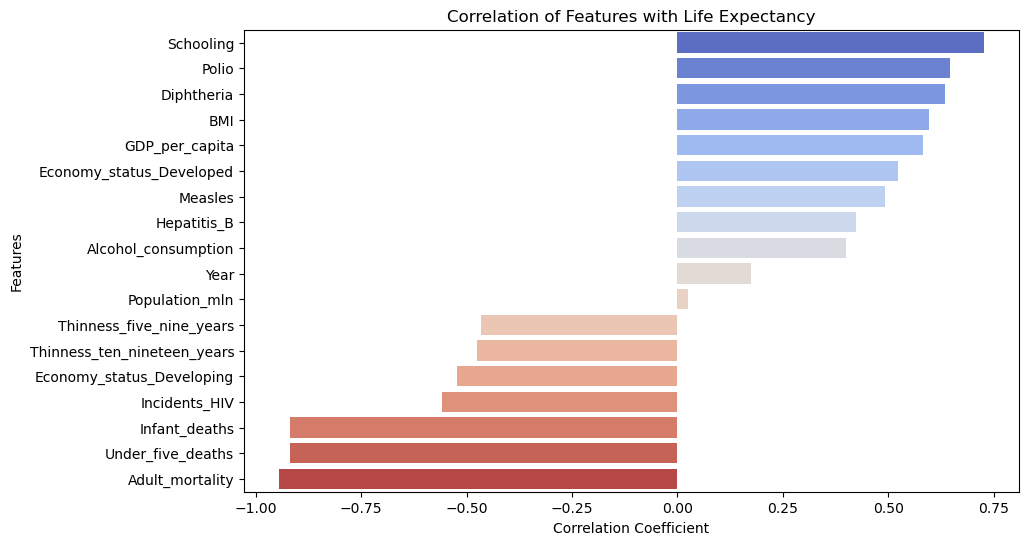

In [16]:
# Visualise the correlations between features & target,

X_train['Life_expectancy'] = y_train

correlation_with_target = X_train.corr(numeric_only = True)['Life_expectancy'].drop('Life_expectancy').sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=correlation_with_target.values, y=correlation_with_target.index, palette='coolwarm')
plt.title('Correlation of Features with Life Expectancy')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.show()

X_train = X_train.drop(columns=['Life_expectancy'])

## Findings

#### Strongest Correlations:

**Positive:**
- **Schooling**: Highest positive correlation with life expectancy.
    - Interpretation: higher levels of education are strongly associated with improved life expectancy.
- **Polio (Immunisation Coverage)**
- **Diphtheria (Immunisation Coverage)**
    - Interpretation: Vaccination & immunisation significantly contribute to life expectancy.

**Negative:**
- **Adult Mortality**: Strongest negative correlation.
   - Interpretation: Tautologically, higher mortality entails lower life expectancy.
- **Under-Five Deaths**
- **Infant Deaths**
    - Interpretation: There is a salient correspondence between infant & under-five deaths (multicolinearity risk).


#### Weakest Correlations:
- **Population (in millions)**
    - Interpretation: Almost no correlation, suggesting that sheer population size is not a determinant of life expectancy.
- **Year**
- **Alcohol Consumption**
    - Interpretation: Whilst high alcohol consumption lowers life expectancy at an _individual level_, at a _national level_ high alcohol consumption might be associated with more developed countries, whose other health factors - e.g. public spending - may ameliorate this effect.


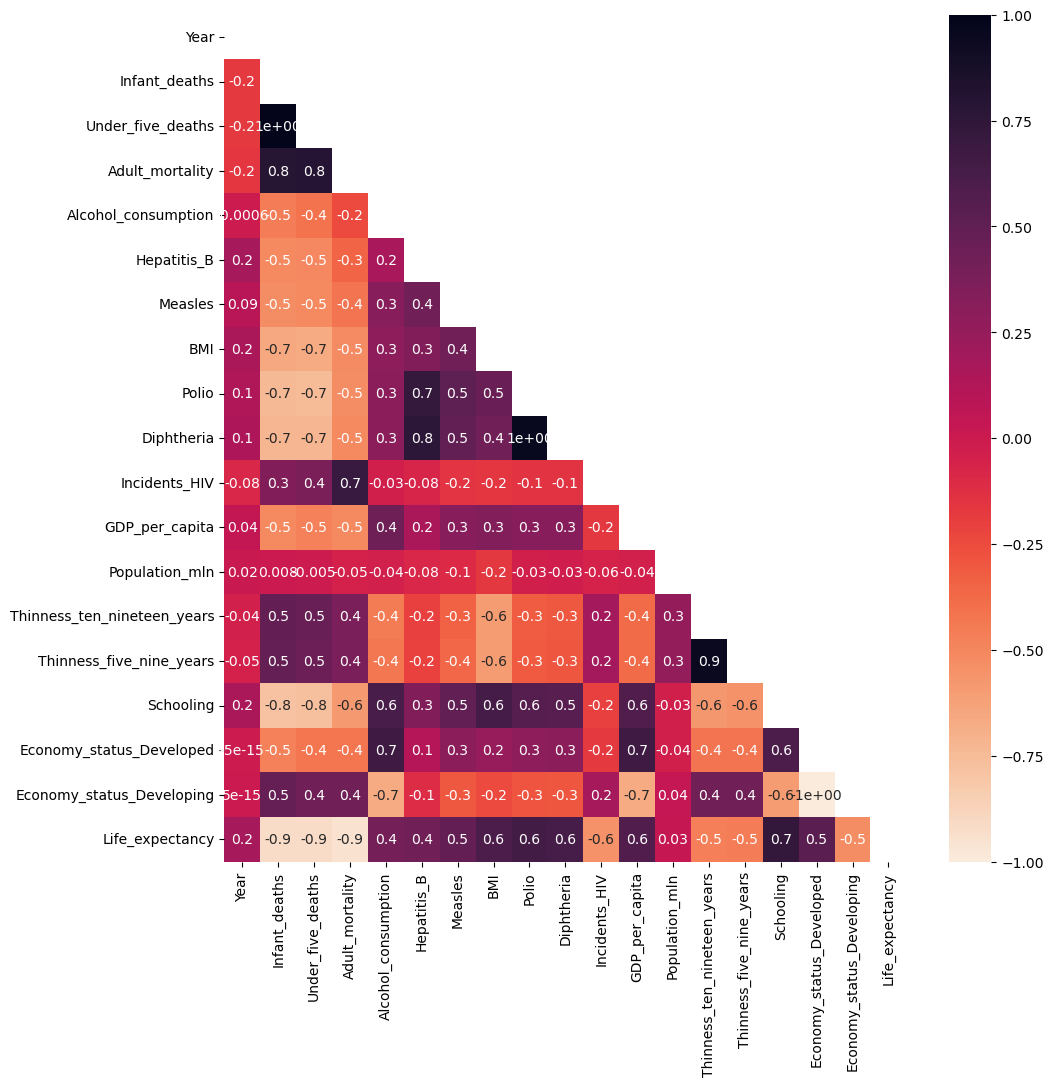

In [18]:
# Create a heatmap to visualise correlations between features

plt.figure(figsize = (11, 11))
sns.heatmap(df.corr(numeric_only = True), 
            annot = True,
            cmap = 'rocket_r',
            vmin = -1,
            vmax = 1,
            fmt = '.1',
            mask = np.triu(df.corr(numeric_only = True)))
 
plt.show()

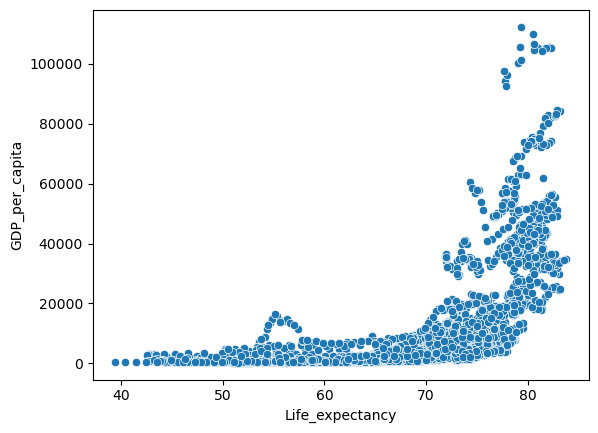

In [19]:
# Create a scatterplot to show the relationship between life expectancy and GDP per capita
sns.scatterplot(data = df, x= 'Life_expectancy', y = 'GDP_per_capita')
plt.show()

- This scatterplot reveals that life expectancy and GDP per capita have an exponential relationship.
- To make this relationship linear, we shall next apply a logarithmic transformation to GDP per capita.

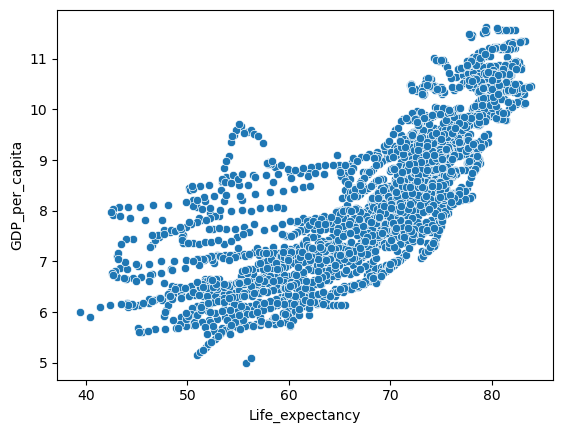

In [21]:
log = np.log(df['GDP_per_capita'])
sns.scatterplot(data = df, x= 'Life_expectancy', y = log)
plt.show()

# 4. Feature Engineering


### Our EDA revealed several aspects of the data that require transformation before being fitted. 
#### In particular: 

- **Non-numeric data**: The Region column.
- **Redundant columns**: Some features may introduce multicollinearity. 
- **Exponential relationship**: GDP per capita & life expectancy, requiring a logarithmic transformation.
- **Feature scaling**: Features vary significantly in scale.

As such our feature engineering function:   
	1.	Removes redundant and irrelevant columns.  
	2.	Encodes the Region column using one-hot encoding.  
	3.	Applies logarithmic transformation to GDP per capita.  
	4.	Standardises the features.  
	5.	Evaluates and mitigates multicollinearity through VIF analysis (using a seperate function).  

In [23]:
def feature_eng(data):
    data = data.copy()

    # Removing autocorrelated columns
    
    data = data.drop(columns = ['Country', 'Economy_status_Developing', 'Infant_deaths'])
    
    # One hot encoding
    
    data = pd.get_dummies(data, columns = ['Region'], drop_first = True, prefix = 'Region', dtype=int) 

    # Fixing exponential relationship

    data['log_GDP'] =  np.log(data['GDP_per_capita'])

    # Scaling
    
    scaler = StandardScaler()
    data[data.columns] = scaler.fit_transform(data[data.columns])

    # VIF

    data_col = data.columns
    
    calculate_vif(data[data_col])
    
    data = sm.add_constant(data)
    return data

In [24]:
## This a piece of code from stats.stackexchange.com
## It runs the model with all the variables.
## If any of them have a higher VIF than 5, it drops the max. 
## Then it keeps going until none of them have a higher VIF than 5.
## This leaves us with a nice set of features with no collineraity

def calculate_vif(X, thresh = 5.0):
    variables = list(range(X.shape[1]))
    dropped = True
    while dropped:
        dropped = False
        # this bit uses list comprehension to gather all the VIF values of the different variables
        vif = [variance_inflation_factor(X.iloc[:, variables].values, ix)
               for ix in range(X.iloc[:, variables].shape[1])]
        
        maxloc = vif.index(max(vif)) # getting the index of the highest VIF value
        if max(vif) > thresh:
            del variables[maxloc] # we delete the highest VIF value on condition that it's higher than the threshold
            dropped = True # if we deleted anything, we set the 'dropped' value to True to stay in the while loop    
    
    global optimal_cols 
    optimal_cols = list(X.columns[variables])
    optimal_cols.append('const')

    # We now create a global variable and assign the list of columns still in the valid set to it, remembering to add the constant back in. We can use this to check for an optimal condition number.
    
    return optimal_cols

In [25]:
# Apply feature engineering to training set
X_train_fe = feature_eng(X_train)

### Next, we inspect the transformed training set to ensure data integrity has been preserved

In [27]:
X_train_fe.head()

,const,Year,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,...,Economy_status_Developed,Region_Asia,Region_Central America and Caribbean,Region_European Union,Region_Middle East,Region_North America,Region_Oceania,Region_Rest of Europe,Region_South America,log_GDP
1680,1.0,-0.085510,0.137039,-0.351286,-1.083147,-0.020056,0.677760,-0.114456,-0.097782,-0.020917,...,-0.510075,2.424846,-0.347623,-0.423924,-0.286691,-0.126351,-0.258979,-0.309270,-0.272166,-1.289892
2675,1.0,-0.949477,2.151642,1.393963,0.383955,0.169292,-1.085028,-1.963016,-0.758410,-0.279951,...,-0.510075,-0.412397,-0.347623,-0.423924,-0.286691,-0.126351,-0.258979,-0.309270,-0.272166,-1.884274
2247,1.0,1.426430,-0.767615,-0.460535,1.372928,0.674219,0.624343,0.578754,0.100406,0.108600,...,1.960498,-0.412397,-0.347623,2.358913,-0.286691,-0.126351,-0.258979,-0.309270,-0.272166,0.295892
2088,1.0,0.778456,-0.893951,-1.106856,0.401571,0.232408,0.891432,0.624968,0.496783,0.497150,...,1.960498,-0.412397,-0.347623,-0.423924,-0.286691,-0.126351,-0.258979,3.233419,-0.272166,1.943239
2331,1.0,1.426430,1.219916,1.172945,0.955194,-1.976650,-0.711103,-0.530382,-2.079666,-4.294968,...,-0.510075,-0.412397,-0.347623,-0.423924,-0.286691,-0.126351,-0.258979,-0.309270,-0.272166,0.744062


In [28]:
X_train_fe.describe()

,const,Year,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,...,Economy_status_Developed,Region_Asia,Region_Central America and Caribbean,Region_European Union,Region_Middle East,Region_North America,Region_Oceania,Region_Rest of Europe,Region_South America,log_GDP
count,2291.0,2.291000e+03,2.291000e+03,2.291000e+03,2.291000e+03,2.291000e+03,2.291000e+03,2.291000e+03,2.291000e+03,2.291000e+03,...,2.291000e+03,2.291000e+03,2.291000e+03,2.291000e+03,2.291000e+03,2.291000e+03,2.291000e+03,2.291000e+03,2.291000e+03,2.291000e+03
mean,1.0,2.345396e-14,-3.799279e-17,-6.047832e-17,-4.031888e-17,-4.140439e-16,-1.891886e-16,1.184367e-15,1.969422e-16,-2.930872e-16,...,-3.256525e-17,-5.272469e-17,2.791307e-17,4.652179e-17,1.860871e-17,2.481162e-17,2.326089e-18,-2.636235e-17,1.395654e-17,3.954352e-16
std,0.0,1.000218e+00,1.000218e+00,1.000218e+00,1.000218e+00,1.000218e+00,1.000218e+00,1.000218e+00,1.000218e+00,1.000218e+00,...,1.000218e+00,1.000218e+00,1.000218e+00,1.000218e+00,1.000218e+00,1.000218e+00,1.000218e+00,1.000218e+00,1.000218e+00,1.000218e+00
min,1.0,-1.597451e+00,-9.119988e-01,-1.240257e+00,-1.219036e+00,-4.438172e+00,-3.595665e+00,-2.425155e+00,-5.184617e+00,-4.554001e+00,...,-5.100745e-01,-4.123973e-01,-3.476226e-01,-4.239241e-01,-2.866911e-01,-1.263508e-01,-2.589794e-01,-3.092701e-01,-2.721655e-01,-2.304910e+00
25%,1.0,-9.494766e-01,-7.473112e-01,-7.387352e-01,-9.057356e-01,-3.987517e-01,-7.111029e-01,-8.076657e-01,-3.620333e-01,-3.447089e-01,...,-5.100745e-01,-4.123973e-01,-3.476226e-01,-4.239241e-01,-2.866911e-01,-1.263508e-01,-2.589794e-01,-3.092701e-01,-2.721655e-01,-7.835942e-01
50%,1.0,-8.551041e-02,-4.450079e-01,-2.475456e-01,-1.822504e-01,2.955237e-01,3.038357e-01,2.552562e-01,4.307202e-01,4.323913e-01,...,-5.100745e-01,-4.123973e-01,-3.476226e-01,-4.239241e-01,-2.866911e-01,-1.263508e-01,-2.589794e-01,-3.092701e-01,-2.721655e-01,-3.839918e-02
75%,1.0,7.784558e-01,5.216856e-01,4.704294e-01,7.224208e-01,7.373353e-01,8.380140e-01,6.249681e-01,6.949714e-01,6.914247e-01,...,-5.100745e-01,-4.123973e-01,-3.476226e-01,-4.239241e-01,-2.866911e-01,-1.263508e-01,-2.589794e-01,-3.092701e-01,-2.721655e-01,7.135803e-01
max,1.0,1.642422e+00,4.109845e+00,4.572048e+00,3.277896e+00,9.266831e-01,1.158521e+00,3.259166e+00,8.270970e-01,8.209414e-01,...,1.960498e+00,2.424846e+00,2.876683e+00,2.358913e+00,3.488075e+00,7.914473e+00,3.861311e+00,3.233419e+00,3.674235e+00,2.237428e+00


In [29]:
X_train_fe.isna().sum()

const                                   0
Year                                    0
Under_five_deaths                       0
Adult_mortality                         0
Alcohol_consumption                     0
Hepatitis_B                             0
Measles                                 0
BMI                                     0
Polio                                   0
Diphtheria                              0
Incidents_HIV                           0
GDP_per_capita                          0
Population_mln                          0
Thinness_ten_nineteen_years             0
Thinness_five_nine_years                0
Schooling                               0
Economy_status_Developed                0
Region_Asia                             0
Region_Central America and Caribbean    0
Region_European Union                   0
Region_Middle East                      0
Region_North America                    0
Region_Oceania                          0
Region_Rest of Europe             

In [30]:
X_train_fe.columns

Index(['const', 'Year', 'Under_five_deaths', 'Adult_mortality',
       'Alcohol_consumption', 'Hepatitis_B', 'Measles', 'BMI', 'Polio',
       'Diphtheria', 'Incidents_HIV', 'GDP_per_capita', 'Population_mln',
       'Thinness_ten_nineteen_years', 'Thinness_five_nine_years', 'Schooling',
       'Economy_status_Developed', 'Region_Asia',
       'Region_Central America and Caribbean', 'Region_European Union',
       'Region_Middle East', 'Region_North America', 'Region_Oceania',
       'Region_Rest of Europe', 'Region_South America', 'log_GDP'],
      dtype='object')

In [31]:
# check all columns in X_train_fe are included in the list of selected feature_cols.
for each in X_train_fe:
    if each not in feature_cols:
        print(each)

const
Region_Asia
Region_Central America and Caribbean
Region_European Union
Region_Middle East
Region_North America
Region_Oceania
Region_Rest of Europe
Region_South America
log_GDP


In [32]:
feature_cols = ['const', 'Year', 'Under_five_deaths', 'Adult_mortality',
       'Alcohol_consumption', 'Hepatitis_B', 'BMI', 'Polio',
       'Diphtheria', 'Incidents_HIV', 
       'Thinness_ten_nineteen_years', 'Schooling',
       'Economy_status_Developed', 'Region_Asia', 'Region_Middle East', 
       'Region_Central America and Caribbean', 'Region_European Union',
       'Region_North America', 'Region_Oceania',
       'Region_Rest of Europe', 'Region_South America', 'log_GDP']


# 5. Advanced Model

### Aim of this model: 
#### To design a model that incorporates all features that have predictive power, prioritising _accuracy_.

In [101]:
# Fit an Ordinary Least Squares regression model and display the summary of results.
lin_reg = sm.OLS(y_train, X_train_fe[feature_cols])
results = lin_reg.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_expectancy   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     6480.
Date:                Mon, 09 Dec 2024   Prob (F-statistic):               0.00
Time:                        11:39:28   Log-Likelihood:                -3673.4
No. Observations:                2291   AIC:                             7391.
Df Residuals:                    2269   BIC:                             7517.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                   68.8680      0.025   2727.857      0.000      68.818      68.918
Year                                     0.1834      0.027      6.796      0.000       0.131       0.236
Under_five_deaths                       -3.4189      0.077    -44.349      0.000      -3.570      -3.268
Adult_mortality                         -5.3247      0.073    -73.025      0.000      -5.468      -5.182
Alcohol_consumption                     -0.0890      0.047     -1.907      0.057      -0.180       0.003
Hepatitis_B                             -0.1266      0.041     -3.108      0.002      -0.207      -0.047
BMI                                     -0.4056      0.049     -8.243      0.000      -0.502      -0.309
Polio                                    0.3417      0.090      3.796      0.000       0.165       0.518
Diphtheria                              -0.2280      0.093     -2.456      0.014      -0.410      -0.046
Incidents_HIV                            0.1931      0.045      4.250      0.000       0.104       0.282
Thinness_ten_nineteen_years             -0.1251      0.038     -3.298      0.001      -0.200      -0.051
Schooling                                0.2649      0.059      4.474      0.000       0.149       0.381
Economy_status_Developed                 1.0693      0.065     16.541      0.000       0.943       1.196
Region_Asia                              0.0844      0.039      2.140      0.032       0.007       0.162
Region_Middle East                       0.0585      0.037      1.576      0.115      -0.014       0.131
Region_Central America and Caribbean     0.5687      0.038     15.139      0.000       0.495       0.642
Region_European Union                   -0.2343      0.065     -3.600      0.000      -0.362      -0.107
Region_North America                     0.0846      0.031      2.768      0.006       0.025       0.144
Region_Oceania                          -0.2057      0.035     -5.811      0.000      -0.275      -0.136
Region_Rest of Europe                    0.1471      0.041      3.563      0.000       0.066       0.228
Region_South America                     0.3875      0.035     11.176      0.000       0.319       0.455
log_GDP                                  0.6520      0.060     10.925      0.000       0.535       0.769
==============================================================================
Omnibus:                       14.860   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               17.844
Skew:                           0.115   Prob(JB):                     0.000133
Kurtosis:                       3.366   Cond. No.                         12.7
===============================================================

In [108]:
# Predict life_expectancy for train data and calculate RMSE
y_pred = results.predict(X_train_fe[feature_cols])
rmse = statsmodels.tools.eval_measures.rmse(y_train, y_pred)
print(rmse)

1.202577677939954


In [96]:
# Apply feature engineering to test data and specify features specific to sensitive model
X_test_fe = feature_eng(X_test)
X_test_fe = X_test_fe[feature_cols]

# Predict life_expectancy for test data and calculate RMSE
y_test_pred = results.predict(X_test_fe)
rmse = statsmodels.tools.eval_measures.rmse(y_test, y_test_pred)
print(rmse)

1.1928700171976958


| Metric | Result | 
| --- | --- | 
| R-squared | 0.984 |
| AIC | 7391 |
| BIC | 7517 |
| Conditional Number | 12.7 |
| RMSE of Test data | 1.19 |


### **Evaluation:**
- An **R-squared** of **0.984**. This indicated that 98.4% of the variation in life expectancy is explained by the features used in your model. This shows our linear regression model _fits the data very well_. 
- A **Condition Number** of **12.7** indicates there is a relatively _low degree of multicolinearity_, vindicating our exclusion of redundant columns.
- The **P-values** of our features are almost all below the 0.05 threshold. Alcohol consumption (0.057) could be interpreted as noise (not improving the model's predictive power) and therefore may be suitable for exclusion in further model refinement.
- Our model's **RMSE** of **1.19** constitutes a significant improvement in _accuracy_ (against the benchmark of 2).

# 6. Minimalist Model

### Aim of this model: 
#### To design a function that required the **least** amount of information necessary to make accurate predictions, prioritising data sensitivity. 

When evaluating features for inclusion, we prioritised minimising sensitivity by considering the following factors:
* **Financial Implications**: How the inclusion of certain features could impact countries and regions economically
* **Individual Data Sensitivity**: The level of privacy required to protect personal and sensitive information

Except for **Adult Mortality**, we chose to exclude all features related to healthcare, as we felt these could introduce unnecessary sensitivity or bias into our model. Instead we foucsed on general features that were less likely to compromise data privacy or have ethical concerns. 

We chose to include **Adult Mortality** because this information is publicy available on the WHO webpage. Therefore we determined it did not pose significant privacy or sensitivity risks.

The four selected features are:
* `Year`
* `Log_GDP`
* `Alcohol consumption`
* `Adult mortality`

In [42]:
# Columns restricted for sensitivity
feature_cols_sensitive = ['const','Year', 'Alcohol_consumption', 
                         'log_GDP', 'Adult_mortality']

In [43]:
# Fit an Ordinary Least Squares regression model and display the summary of results.
lin_reg = sm.OLS(y_train, X_train_fe[feature_cols_sensitive])
results = lin_reg.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_expectancy   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     9462.
Date:                Mon, 09 Dec 2024   Prob (F-statistic):               0.00
Time:                        10:46:29   Log-Likelihood:                -5099.5
No. Observations:                2291   AIC:                         1.021e+04
Df Residuals:                    2286   BIC:                         1.024e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  68.8680      0.047   1469.280      0.000      68.776      68.960
Year                    0.3297      0.048      6.938      0.000       0.237       0.423
Alcohol_consumption     0.7905      0.058     13.659      0.000       0.677       0.904
log_GDP                 2.1598      0.076     28.439      0.000       2.011       2.309
Adult_mortality        -7.1659      0.066   -109.273      0.000      -7.294      -7.037
==============================================================================
Omnibus:                      249.212   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              709.473
Skew:                          -0.580   Prob(JB):                    8.71e-155
Kurtosis:                       5.467   Cond. No.                         2.94
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
# Predict life_expectancy for train data and calculate RMSE
y_pred = results.predict(X_train_fe[feature_cols_sensitive])
rmse = statsmodels.tools.eval_measures.rmse(y_train, y_pred)
print(rmse)

2.2410468387865428


In [53]:
# Apply feature engineering to test data 
X_test_fe = feature_eng(X_test)
X_test_fe = X_test_fe[feature_cols_sensitive]

# Predict life_expectancy for test data and calculate RMSE
y_test_pred = results.predict(X_test_fe)
rmse = statsmodels.tools.eval_measures.rmse(y_test, y_test_pred)
print(rmse)

2.203725086287699


| Metric | Result for Advanced Model | Result for Minimalist Model
| --- | --- | --- |
| R-squared | 0.984 | 0.943 |
| Conditional Number | 12.7 | 2.94 |
| RMSE of Test data | 1.19 | 2.20 |

### **Evaluation:**
- An **R-squared** of **0.943** indicates that 94.3% of the variance in life expectancy is explained by the features in our model, suggesting even with the restricted features, our linear regression model _fits the data very well_.
- A **Condition Number** of **2.94** suggests there is an extremely low degree of multicollinearity, which indicates stable and reliable coefficient estimates.
- The **P-values** for all features are below the 0.05 threshold, confirming that each feature is statistically significant in explaining the dependent variable.
- The **RMSE** of **2.20** is higher than that of the full model, indicating that the current model has a slightly lower prediction accuracy. However, this was expected, as the model is running on a more refined set of features.

